https://projetos.extras.ufg.br/processos/Dicionario%20de%20Dados/Dicionario%20de%20Dados/

# Dataset de Treinamento

In [30]:
import psycopg2
import os
import pandas as pd


with psycopg2.connect(host='albiorix.unifei.edu.br',user='devro',password='h4duk3n#r1u',dbname='sigaa') as csig:
    with open('sigaa_evasao.sql', mode='r', encoding='utf8') as f:
        cmd_sql = f.read()
    evasao = pd.read_sql_query(cmd_sql, csig)
    evasao = evasao.set_index('doc')

    evasao.to_csv('sigaa_evasao_2022_1.csv')

evasao = evasao.fillna(value=-1)
evasao.shape

c:\Desenvolvimento\Evasao_Alunos\venv\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


(6107, 23)

In [31]:
import os
import pandas as pd

evasao = pd.read_csv('sigaa_evasao_2022_1.csv')
evasao = evasao.set_index('doc')
evasao = evasao.fillna(value=-1)
evasao.shape

(6107, 23)

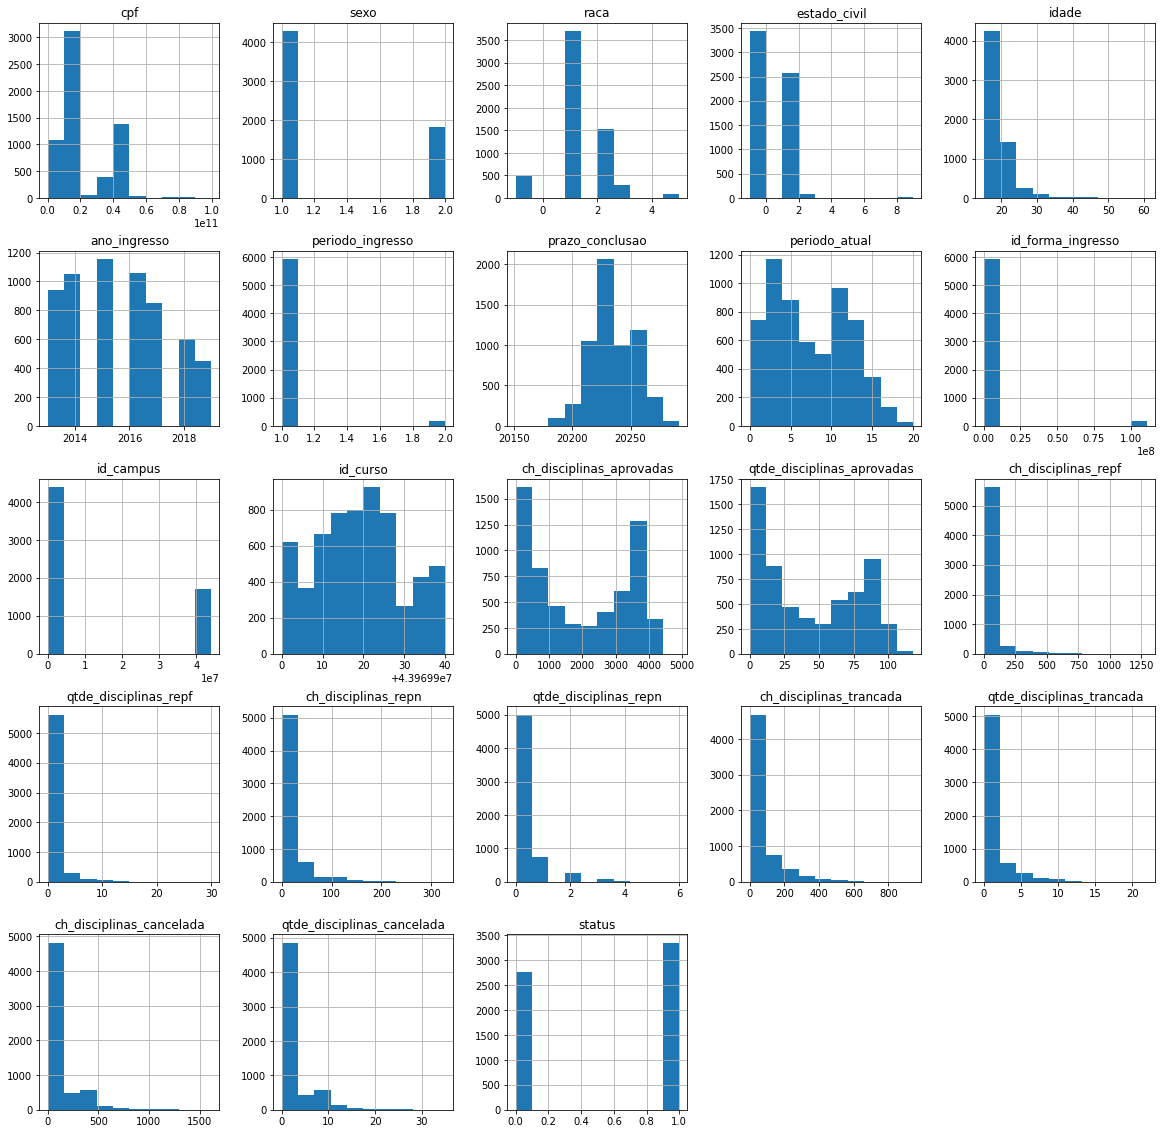

In [32]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)
_ = evasao.hist()

c:\Desenvolvimento\Evasao_Alunos\venv\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Desenvolvimento\Evasao_Alunos\venv\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


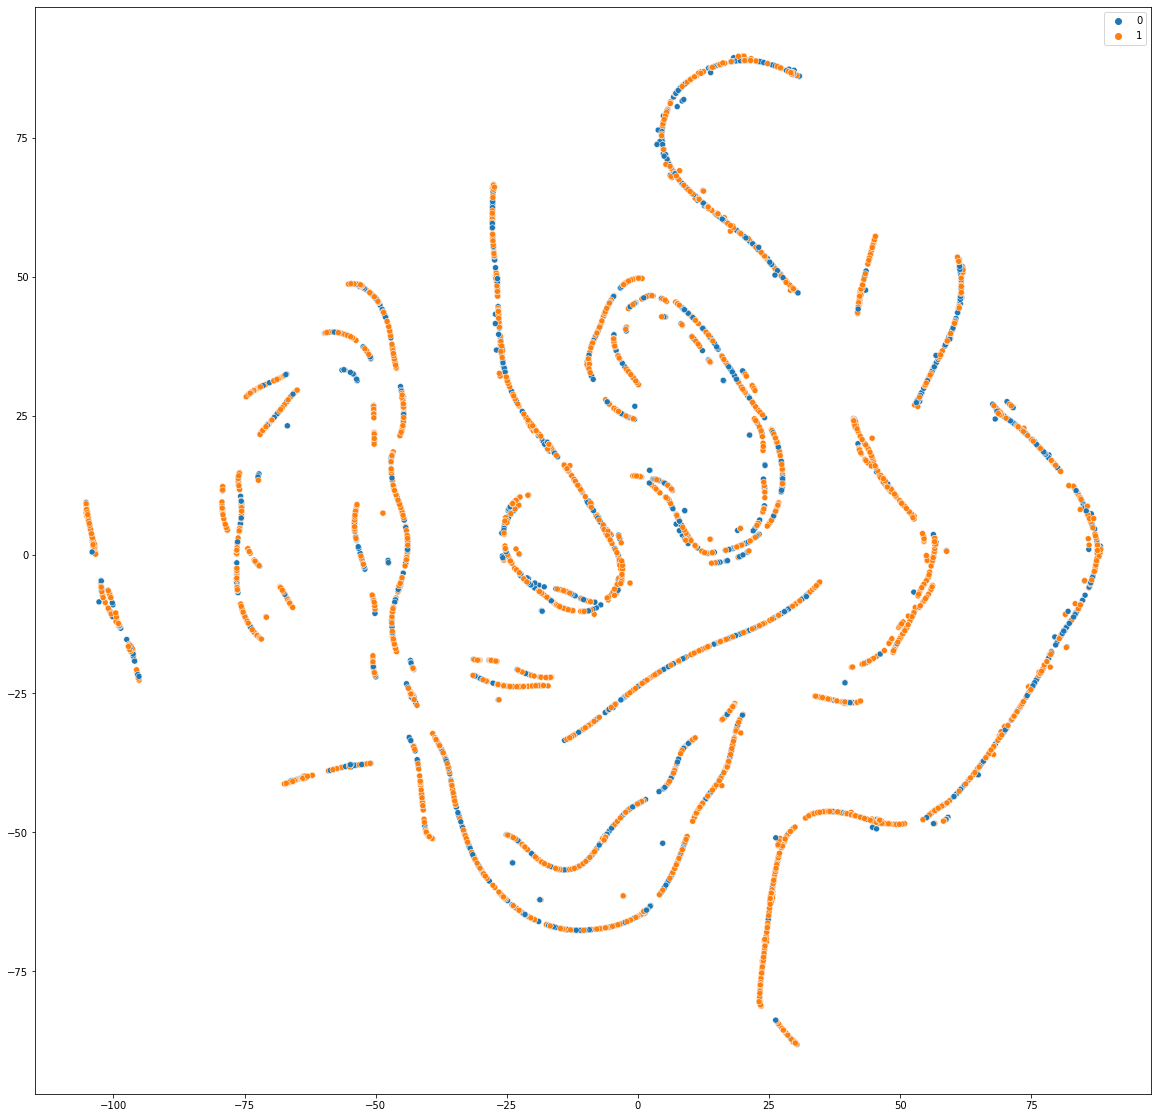

In [33]:
from sklearn.manifold import TSNE
import seaborn as sns
X = evasao[evasao.columns[:-1]].values
y = evasao[evasao.columns[-1]].values
Xp = TSNE().fit_transform(X)
_ = sns.scatterplot(x=Xp[:,0],y=Xp[:,1],hue=y)

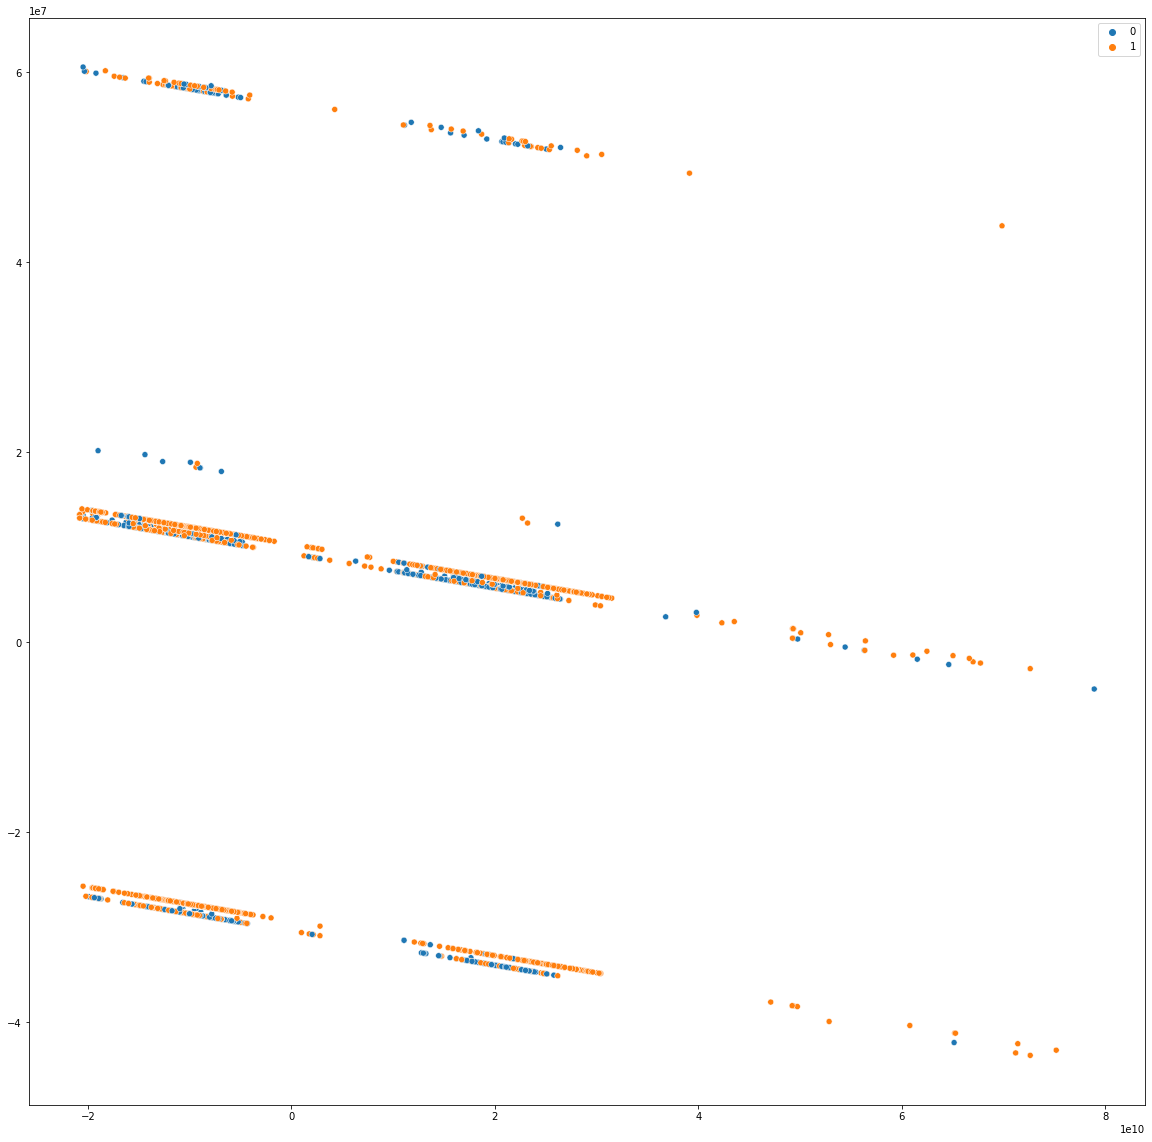

In [34]:
from sklearn.decomposition import PCA
import seaborn as sns
X = evasao[evasao.columns[:-1]].values
y = evasao[evasao.columns[-1]].values
Xp = PCA(n_components=2).fit_transform(X)
_ = sns.scatterplot(x=Xp[:,0],y=Xp[:,1],hue=y)

# Treinamento

In [35]:
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import time

tecnicas = [
  PassiveAggressiveClassifier(random_state=42),
  SGDClassifier(random_state=42),
  RidgeClassifier(random_state=42),
  DecisionTreeClassifier(max_depth=8,random_state=42),
  ExtraTreeClassifier(max_depth=8,random_state=42),
  KNeighborsClassifier(),
  RadiusNeighborsClassifier(),
  SVC(random_state=42),
  NuSVC(random_state=42),
  LinearSVC(random_state=42),
  RandomForestClassifier(max_depth=8,random_state=42),
  AdaBoostClassifier(random_state=42),
  BaggingClassifier(random_state=42),
  HistGradientBoostingClassifier(max_depth=8,random_state=42),
  GradientBoostingClassifier(max_depth=8,random_state=42),
  ExtraTreesClassifier(max_depth=8,random_state=42),
  MLPClassifier(hidden_layer_sizes=(2000,),random_state=42, max_iter=3000),
]

X = evasao[evasao.columns[:-1]].values
y = evasao[evasao.columns[-1]].values


res = []
for tec in tecnicas:
    metricas = ['balanced_accuracy','precision','recall','f1']
    #metricas = [accuracy','precision_micro','recall_micro','f1_micro']
    grid = GridSearchCV(tec,{},scoring=metricas,n_jobs=-1,refit=False,cv=5)
    grid.fit(X,y)
    dn = {
      'name':tec.__class__.__name__,
      'time':grid.cv_results_['mean_fit_time'][0],
      }
    for mt in metricas:
      dn[mt] = grid.cv_results_[f'mean_test_{mt}'][0]

    res.append(dn)
    
resultados = pd.DataFrame(data=res)
resultados = resultados.sort_values(by='f1',ascending=False)
resultados.to_csv('resultados.csv')
resultados

c:\Desenvolvimento\Evasao_Alunos\venv\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


,name,time,balanced_accuracy,precision,recall,f1
2,RidgeClassifier,0.013794,0.967927,0.986752,0.952521,0.968391
13,HistGradientBoostingClassifier,1.241235,0.926282,0.945609,0.933723,0.932506
15,ExtraTreesClassifier,0.360655,0.906917,0.932300,0.925066,0.918561
10,RandomForestClassifier,0.556824,0.904441,0.935914,0.909245,0.909365
14,GradientBoostingClassifier,3.236605,0.904620,0.942773,0.894022,0.901056
12,BaggingClassifier,0.204028,0.892922,0.946345,0.864468,0.877023
3,DecisionTreeClassifier,0.028738,0.885312,0.933756,0.864466,0.872019
11,AdaBoostClassifier,0.419651,0.870803,0.940455,0.830737,0.830529
4,ExtraTreeClassifier,0.006320,0.738498,0.835764,0.700184,0.706985
7,SVC,3.592580,0.550277,0.579603,0.830626,0.682107


# Experimento com Alunos Ativos

In [36]:
with psycopg2.connect(host='albiorix.unifei.edu.br',user='devro',password='h4duk3n#r1u',dbname='sigaa') as csig:
    with open('sigaa_avaliacao.sql', mode='r', encoding='utf8') as f:
        cmd_sql = f.read()
    ativos = pd.read_sql_query(cmd_sql, csig)
    ativos = ativos.set_index('doc')

    ativos.to_csv('sigaa_ativos_2022_1.csv')
ativos = ativos.fillna(value=-1)
ativos.shape

c:\Desenvolvimento\Evasao_Alunos\venv\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


(3822, 16)

In [37]:
clf = HistGradientBoostingClassifier(max_depth=8,random_state=42)

X = evasao[evasao.columns[:-1]].values
y = evasao[evasao.columns[-1]].values

clf.fit(X,y)
print('Evasão Acurácia Train:',clf.score(X,y))

Xa = ativos[ativos.columns[:-1]].values

Ya = clf.predict(Xa)
Pa = clf.predict_proba(Xa)[:,1]

len([y for y in Ya if y==1])

Evasão Acurácia Train: 1.0


ValueError: X has 15 features, but HistGradientBoostingClassifier is expecting 22 features as input.

In [27]:
avaliados = ativos.copy()
avaliados['evasao'] = Ya
avaliados['prob'] = Pa
avaliados = avaliados[avaliados['evasao']==1].sort_values(by='prob',ascending=False)
avaliados.to_csv('evasao_ativos.csv')
avaliados[['evasao','prob']]

NameError: name 'Ya' is not defined